### Hands-on Session on Machine Learning - PySR
by Mudit Dixit, CSIR-CLRI

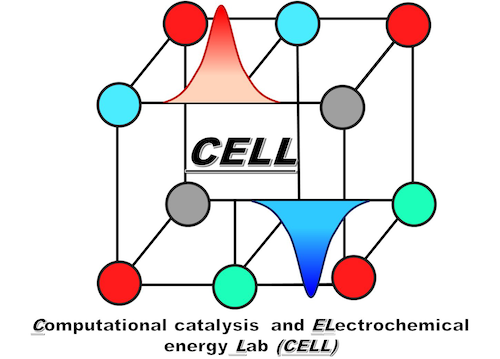

#### Import all required libraries ####
- Matplotlib 
- seaborn 
- panda
- PySR
- Scikit-learn


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pysr import *
from sklearn.model_selection import train_test_split

In [3]:
pip install pysr

Note: you may need to restart the kernel to use updated packages.


##### Install Julia Python #####

In [5]:
%pip install julia

Note: you may need to restart the kernel to use updated packages.


**Installing Julia on linux:**
*Run the following code to install Julia*

%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.5"
export JULIA_PKG_PRECOMPILE_AUTO=0
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  echo "Installing PyCall.jl..."
  julia -e 'using Pkg; Pkg.add("PyCall"); Pkg.build("PyCall")'
  julia -e 'println("Success")'

fi

**Install PySR and PyTorch-Lightning:**

In [ ]:
%pip install -Uq pysr pytorch_lightning

In [1]:
from julia import Julia

Read the data from the excel file using Panda's read Excel function. 
The data has been adopted from 
An Element-Based Generalized Coordination Number for Predicting the Oxygen Binding Energy on Pt3M (M = Co, Ni, or Cu) Alloy Nanoparticles
Yusuke Nanba* and Michihisa Koyama* ACS Omega 2021, 6, 4, 3218–3226


In [4]:
data = pd.read_excel('O_ads_small.xlsx')

In [5]:
data

,Binding_energy,CN,GCN,GCN-Pt-Pt,GCN-Pt-M,GCN-M-Pt,GCN-M-M,d-Band_Center
0,-4.175,7.333,4.591,2.864,1.182,0.409,0.136,-2.540
1,-3.980,7.333,4.591,2.273,0.682,0.864,0.773,-2.611
2,-4.188,7.333,4.591,3.409,1.182,0.000,0.000,-2.512
3,-4.117,7.333,4.591,3.227,0.818,0.364,0.182,-2.527
4,-4.004,7.333,4.591,2.227,0.727,0.864,0.773,-2.622
...,...,...,...,...,...,...,...,...
73,-3.591,9.000,6.955,4.136,1.182,1.091,0.545,-2.741
74,-3.811,9.000,6.955,4.955,1.455,0.273,0.273,-2.637
75,-3.603,9.000,6.955,4.182,1.136,0.818,0.818,-2.746
76,-3.529,9.000,6.955,3.682,1.091,1.364,0.818,-2.753


PySR model requires the data to be in numpy array format. We will use to_numpy function to convert data form dataframe to numpy array. 

In [17]:
y=data['Binding_energy'].to_numpy()
y

array([-4.175, -3.98 , -4.188, -4.117, -4.004, -4.067, -4.161, -4.071,
       -4.166, -4.129, -3.966, -4.163, -4.07 , -4.091, -4.008, -4.132,
       -4.002, -4.197, -4.072, -3.792, -3.757, -3.664, -3.709, -3.733,
       -3.902, -3.901, -3.653, -3.761, -3.79 , -3.87 , -3.839, -3.658,
       -3.566, -3.735, -3.598, -3.743, -3.741, -3.485, -3.733, -3.768,
       -3.848, -3.834, -3.536, -3.967, -3.907, -4.139, -3.945, -4.084,
       -3.812, -4.058, -3.97 , -4.082, -4.043, -3.951, -3.939, -4.031,
       -3.738, -3.727, -3.814, -3.682, -3.708, -3.612, -3.827, -3.665,
       -3.851, -3.855, -3.648, -3.503, -3.361, -3.532, -3.365, -3.62 ,
       -3.452, -3.591, -3.811, -3.603, -3.529, -3.543])

In [18]:
X = data.iloc[:, 1:7].to_numpy()
X

array([[7.333, 4.591, 2.864, 1.182, 0.409, 0.136],
       [7.333, 4.591, 2.273, 0.682, 0.864, 0.773],
       [7.333, 4.591, 3.409, 1.182, 0.   , 0.   ],
       [7.333, 4.591, 3.227, 0.818, 0.364, 0.182],
       [7.333, 4.591, 2.227, 0.727, 0.864, 0.773],
       [7.333, 4.591, 2.5  , 1.   , 0.591, 0.5  ],
       [7.333, 4.591, 3.136, 0.909, 0.409, 0.136],
       [7.333, 4.591, 2.591, 0.909, 0.727, 0.364],
       [7.333, 4.591, 2.545, 0.955, 0.727, 0.364],
       [7.333, 4.591, 3.227, 0.818, 0.364, 0.182],
       [7.333, 4.591, 2.273, 0.682, 0.773, 0.864],
       [7.333, 4.591, 3.727, 0.864, 0.   , 0.   ],
       [7.333, 4.591, 2.818, 0.682, 0.682, 0.409],
       [7.333, 4.591, 3.227, 0.818, 0.227, 0.318],
       [7.333, 4.591, 2.227, 0.727, 0.818, 0.818],
       [7.333, 4.591, 2.545, 0.955, 0.727, 0.364],
       [7.333, 4.591, 2.682, 0.818, 0.591, 0.5  ],
       [7.333, 4.591, 3.545, 1.045, 0.   , 0.   ],
       [7.333, 4.591, 3.227, 0.818, 0.409, 0.136],
       [8.333, 5.5  , 3.5  , 0.

By default, we will set up 30 populations of expressions (which evolve independently except for migrations), use 4 threads, and use "best" for our model selection strategy:

In [19]:
default_pysr_params = dict(
    populations=10,
    model_selection="best",
)

PySR can run for arbitrarily long, and continue to find more and more accurate expressions. You can set the total number of cycles of evolution with `niterations`, although there are also a [few more ways](https://github.com/MilesCranmer/PySR/pull/134) to stop execution.

**This first execution will take a bit longer to startup, as the library is JIT-compiled. The next execution will be much faster.**

In [52]:
model = PySRRegressor(
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["exp"],
   select_k_features=5,
)

In [53]:
model.fit(X,y)

/Users/geet/anaconda3/lib/python3.11/site-packages/pysr/sr.py:1346: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Using features ['x0' 'x1' 'x2' 'x4' 'x5']
Started!

Expressions evaluated per second: 1.470e+05
Head worker occupation: 9.7%
Progress: 310 / 600 total iterations (51.667%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           4.642e-02  1.594e+01  y = -3.8377
3           3.289e-02  1.723e-01  y = (-30.849 / x0)
5           9.619e-03  6.147e-01  y = ((-7.2473 / x1) + -2.5229)
7           5.231e-03  3.046e-01  y = (((-6.4796 + x5) / x1) + -2.7639)
9           5.057e-03  1.685e-02  y = (-2.8595 + (((x5 * x4) - 5.9978) / x1))
11          4.807e-03  2.537e-02  y = (-2.8595 + (((x5 * x5) - 5.9978) / (x1 / 0.9689)))
13          4.796e-03  1.129e-03  y = (-2.8595 + (((-0.91703 * -0.18848) - (5.9978 - (x5 * x5)))...
                                   / x1))
14          4.771e-03  5.298e-03  y = (-2.8354 + ((((-2.8354 / exp(x0)) - 5.9728) + (x5 * x5)) /...
                           

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          -3.837694   
	1         0.172288                                  (-30.849203 / x0)   
	2         0.614728                   ((-7.2473235 / x1) + -2.5228717)   
	3   >>>>  0.304594              (-2.7639034 + ((x5 - 6.479448) / x1))   
	4         0.045759       (-2.835443 + (((x5 * x5) - 5.9728374) / x1))   
	5         0.000034  (-2.835443 + (((x5 * (x5 * 0.9983636)) - 5.972...   
	6         0.000046  (-2.835443 + ((((x5 + (x5 * -0.0049465015)) * ...   
	7         0.000323  (-2.835443 + ((((-2.835443 / exp(x0)) - 5.9728...   
	8         0.002296  (-2.835443 + ((((x5 / 5.9728374) - 5.9728374) ...   
	9         0.010827  (-2.835443 + ((((x5 + ((exp(-2.835443) * x4) *...   
	10        0.001704  (-2.8594654 + ((((x5 * (0.5270845 / x2)) * x2)...   
	11        0.030468  (-2.835443 + ((((x4 / ((exp(x0 / x2) - x1) / 0...   
	
	        loss  complexity  
	0   0.046422           1  
	1   0.032891           3  
	2   0.009619           5  
	3   0.005231           7  
	4   0.004773           9  
	5   0.004773          11  
	6   0.004772          13  
	7   0.004771          14  
	8   0.004760          15  
	9   0.004709          16  
	10  0.004685          19  
	11  0.004544          20  
]

In [54]:
from sklearn.model_selection import train_test_split

In [61]:
import sympy

In [62]:
model.sympy()

-2.7826812 + (x5 - 6.366277)/x1

if we use tain_tainst_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [64]:
y_train

array([-4.043, -4.175, -3.855, -3.902, -3.761, -3.87 , -3.682, -3.812,
       -3.536, -3.768, -3.738, -4.084, -3.452, -3.603, -3.665, -3.939,
       -3.741, -3.79 , -3.733, -4.188, -3.532, -3.743, -3.851, -4.031,
       -3.98 , -3.733, -3.566, -4.091, -3.814, -3.839, -4.117, -3.485,
       -3.612, -3.966, -4.067, -3.951, -3.735, -3.62 , -4.129, -3.591,
       -4.166, -3.727, -4.071, -3.848, -3.598, -4.132, -3.834, -3.709,
       -3.811, -3.361, -3.907, -4.161, -4.139, -4.058, -4.072, -3.653,
       -3.827, -3.664, -3.757, -3.901, -4.008, -4.002])

In [65]:
model.fit(X_train,y_train)

/Users/geet/anaconda3/lib/python3.11/site-packages/pysr/sr.py:1886: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/Users/geet/anaconda3/lib/python3.11/site-packages/pysr/sr.py:1346: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Using features ['x0' 'x1' 'x2' 'x4' 'x5']
Started!

Expressions evaluated per second: 1.610e+05
Head worker occupation: 8.4%
Progress: 348 / 600 total iterations (58.000%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           4.182e-02  1.594e+01  y = -3.8419
3           3.476e-02  9.244e-02  y = (-30.937 / x0)
5           1.417e-02  4.488e-01  y = (-5.0849 - (x1 * -0.23134))
7           1.077e-02  1.371e-01  y = (-4.6368 - ((x1 * x0) * -0.017206))
9           5.665e-03  3.213e-01  y = ((((x5 - 5.9363) / x1) - -0.32678) - 3.1969)
11          5.560e-03  9.403e-03  y = ((((x5 - 5.9363) / (x1 / 1.0333)) - -0.36581) - 3.1969)
13          4.796e-03  7.390e-02  y = (((((x4 * x5) - 5.9363) / (x1 - -0.36426)) - -0.26326) - 3...
                                  .1969)
---------------------------------------------------------------------------------------------------
Press 'q' and t

PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                         -3.8418672   
	1        0.092441                                  (-30.937473 / x0)   
	2        0.601422                     ((-6.928233 / x1) - 2.5825832)   
	3  >>>>  0.311331               (((x5 - 6.2187433) / x1) - 2.815447)   
	4        0.004785   ((((x5 / 0.9414731) - 6.21865) / x1) - 2.815447)   
	5        0.102068  ((((-6.264676 - 7.9210634) + exp(x5)) / x0) - ...   
	6        0.014559  (((((x4 * x5) - 5.9363494) / (x1 - -0.36425883...   
	7        0.000774  ((((((x4 * x5) - 5.9363494) / (x1 - -0.3642588...   
	
	       loss  complexity  
	0  0.041823           1  
	1  0.034764           3  
	2  0.010441           5  
	3  0.005602           7  
	4  0.005548           9  
	5  0.005010          10  
	6  0.004796          13  
	7  0.004788          15  
]

In [66]:
y_predict = model.predict(X_test)
y_predict

/Users/geet/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PySRRegressor was fitted with feature names
  warnings.warn(


array([-3.52655315, -3.5331671 , -4.16999793, -4.00162502, -3.71464823,
       -4.00121469, -4.16999793, -4.08091058, -3.61152799, -3.90300216,
       -3.94759065, -4.03696405, -3.64392934, -3.67033461, -3.87176396,
       -3.59197371])

In [67]:
model.sympy()

-2.815447 + (x5 - 6.2187433)/x1

In [68]:

x1_column = data.iloc[:, 1]
x1 = pd.DataFrame(x1_column, columns=[data.columns[1]])
x4_column = data.iloc[:, 4]
x4 = pd.DataFrame(x4_column, columns=[data.columns[4]])


In [69]:
x4

,GCN-Pt-M
0,1.182
1,0.682
2,1.182
3,0.818
4,0.727
...,...
73,1.182
74,1.455
75,1.136
76,1.091


In [70]:
y_predict

array([-3.52655315, -3.5331671 , -4.16999793, -4.00162502, -3.71464823,
       -4.00121469, -4.16999793, -4.08091058, -3.61152799, -3.90300216,
       -3.94759065, -4.03696405, -3.64392934, -3.67033461, -3.87176396,
       -3.59197371])

In [71]:
y_test

array([-3.365, -3.503, -4.163, -4.004, -3.708, -3.945, -4.197, -4.07 ,
       -3.648, -3.967, -3.97 , -4.082, -3.658, -3.543, -3.792, -3.529])

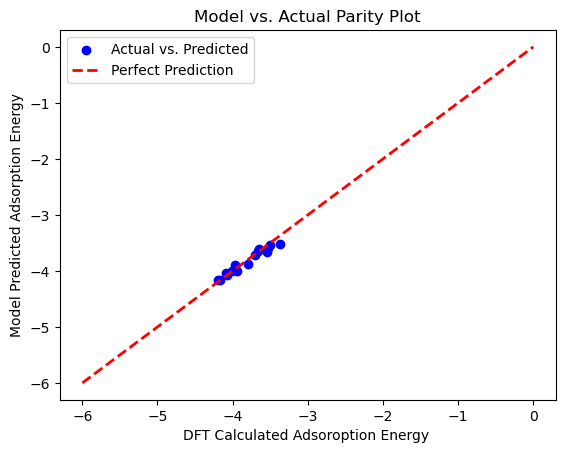

In [72]:
plt.scatter(y_test, y_predict, color='blue', label='Actual vs. Predicted')

# Add a reference line (y=x line)
plt.plot([-6,0], [-6, 0], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('DFT Calculated Adsoroption Energy ')
plt.ylabel('Model Predicted Adsorption Energy')
plt.title('Model vs. Actual Parity Plot')
plt.legend()

In [73]:
ypredict = model.predict(X)
ypredict_simpler = model.predict(X, 3)

print("Default selection MSE:", np.power(ypredict - y, 2).mean())
print("Manual selection MSE for index 3:", np.power(ypredict_simpler - y, 2).mean())

Default selection MSE: 0.005296374249675199
Manual selection MSE for index 3: 0.005296374249675199


/Users/geet/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PySRRegressor was fitted with feature names
  warnings.warn(
/Users/geet/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PySRRegressor was fitted with feature names
  warnings.warn(


In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [75]:
r2=r2_score(y_test,y_predict)

In [76]:
r2

0.9356387902042285

In [77]:
mse=mean_squared_error(y_test,y_predict)
mse

0.004113308827745311

In [78]:
from sklearn.model_selection import KFold

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []

In [81]:
mse_scores = cross_val_score(model, X_test, y_test, cv=5, scoring='r2')

mse_scores = mse_scores

average_mse = np.mean(mse_scores)
#average_mse
mse_scores

/Users/geet/anaconda3/lib/python3.11/site-packages/pysr/sr.py:1346: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Using features ['x0' 'x1' 'x3' 'x4' 'x5']
Started!

Expressions evaluated per second: 1.600e+05
Head worker occupation: 10.8%
Progress: 355 / 600 total iterations (59.167%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           4.646e-02  1.594e+01  y = -3.8424
5           5.477e-03  5.345e-01  y = ((-8.8739 / x1) + -2.2058)
6           4.340e-03  2.328e-01  y = ((-60.641 / exp(x1)) + -3.55)
7           2.302e-03  6.338e-01  y = (((-7.4866 - x3) / x1) + -2.3037)
9           1.978e-03  7.602e-02  y = ((((-7.0831 - 0.59018) - x3) / x1) + -2.2874)
11          1.971e-03  1.677e-03  y = ((-3.1217 + 0.51115) + ((-14.455 + x4) / (x1 + x1)))
12          1.794e-03  9.395e-02  y = (((((x4 / exp(x4)) - x1) - 7.978) / x1) + -1.4636)
13          1.659e-03  7.813e-02  y = (((((x4 / (0.49415 + x4)) - x1) - 7.0326) / x1) + -1.6578)
14          1.425e-03  1.522e-01  y = ((((((x4 / exp(x4)) /

/Users/geet/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PySRRegressor was fitted with feature names
  warnings.warn(
/Users/geet/anaconda3/lib/python3.11/site-packages/pysr/sr.py:1346: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Using features ['x0' 'x1' 'x3' 'x4' 'x5']
Started!

Expressions evaluated per second: 1.480e+05
Head worker occupation: 8.1%
Progress: 326 / 600 total iterations (54.333%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           6.477e-02  1.594e+01  y = -3.7918
3           2.480e-02  4.800e-01  y = (-30.609 / x0)
5           6.206e-03  6.927e-01  y = (-2.3894 + (-7.9287 / x1))
7           4.028e-03  2.162e-01  y = (((-17.707 + x4) / x0) + -1.7138)
8           3.042e-03  2.805e-01  y = (-1.9745 + ((-7.6271 - exp(x3)) / x1))
10          2.992e-03  8.330e-03  y = (-1.9745 + (((-7.6271 - exp(x3)) - 0.032675) / x1))
11          2.823e-03  5.817e-02  y = (-2.4025 + (((-7.8363 - x3) + x5) / (x1 + 0.22121)))
14          2.737e-03  1.031e-02  y = (-2.4025 + (((((-7.8363 - x3) + exp(x5)) - x5) / x1) + -0....
                                  068508))
15          2.455e-03  1.088e-01  y

/Users/geet/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PySRRegressor was fitted with feature names
  warnings.warn(
/Users/geet/anaconda3/lib/python3.11/site-packages/pysr/sr.py:1346: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Using features ['x0' 'x1' 'x3' 'x4' 'x5']
Started!

Expressions evaluated per second: 1.370e+05
Head worker occupation: 8.8%
Progress: 296 / 600 total iterations (49.333%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           6.968e-02  1.594e+01  y = -3.8045
3           6.968e-02  5.960e-08  y = (-4.398 + 0.59349)
5           4.767e-03  1.341e+00  y = ((x1 * 0.26879) - 5.3497)
8           4.020e-03  5.681e-02  y = (((-6.7206 - exp(x3)) / x1) - 2.1526)
9           2.237e-03  5.863e-01  y = (((-1.6748 + (x5 - 5.805)) / x1) - 2.5577)
13          2.237e-03  1.192e-07  y = (((((1.9056 + -2.5449) - 5.6199) + (x5 - 1.2206)) / x1) - ...
                                  2.5577)
14          2.089e-03  6.805e-02  y = ((((-22.56 / x1) + ((exp(x5) * 0.43175) / x3)) / x1) - 3.2...
                                  143)
15          2.028e-03  2.995e-02  y = ((((((-15.618 - x4) / x1) - 2

/Users/geet/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PySRRegressor was fitted with feature names
  warnings.warn(
/Users/geet/anaconda3/lib/python3.11/site-packages/pysr/sr.py:1346: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Using features ['x0' 'x1' 'x3' 'x4' 'x5']
Started!

Expressions evaluated per second: 1.570e+05
Head worker occupation: 12.2%
Progress: 351 / 600 total iterations (58.500%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           6.933e-02  1.594e+01  y = -3.8026
3           1.998e-02  6.221e-01  y = (-30.549 / x0)
5           1.251e-02  2.339e-01  y = (-34.677 / (x0 + 1.0849))
6           1.251e-02  1.128e-04  y = (-34.677 / (x0 + exp(0.078562)))
7           5.723e-03  7.821e-01  y = (-5.2205 + ((-24.287 * x1) / -98.525))
9           4.496e-03  1.206e-01  y = (-5.1953 + (((-20.309 - x5) * x1) / -85.737))
11          2.259e-03  3.441e-01  y = (((x4 - ((x1 - x3) * -92.901)) / 321.96) + -5.1835)
12          2.250e-03  4.009e-03  y = (((exp(x5) - ((x1 - x3) * -92.901)) / 321.96) + -5.1835)
13          2.051e-03  9.272e-02  y = (((x3 - (((x1 - x3) * 12.701) + x5)) / -43.809) + -5.

/Users/geet/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PySRRegressor was fitted with feature names
  warnings.warn(
/Users/geet/anaconda3/lib/python3.11/site-packages/pysr/sr.py:1346: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Using features ['x0' 'x1' 'x3' 'x4' 'x5']
Started!

Expressions evaluated per second: 1.500e+05
Head worker occupation: 9.1%
Progress: 335 / 600 total iterations (55.833%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           6.391e-02  1.594e+01  y = -3.8677
3           2.339e-02  5.025e-01  y = (-30.288 / x0)
5           5.995e-03  6.807e-01  y = ((0.25764 * x1) + -5.2938)
7           2.126e-03  5.183e-01  y = (((x1 + x5) * 0.19324) + -5.0557)
9           1.490e-03  1.780e-01  y = (((x1 + (x5 / x3)) * 0.19324) + -5.0557)
12          1.412e-03  1.771e-02  y = (((-6.8871 + exp((x5 - x3) / 0.50462)) / x1) + -2.6869)
13          1.244e-03  1.268e-01  y = (((-6.8871 + ((exp(x5) * x5) / exp(x3))) / x1) + -2.6869)
15          1.117e-03  5.388e-02  y = (((-6.8871 + ((exp(x5) * x5) / exp(x3 * x3))) / x1) + -2.6...
                                  869)
----------------------------

/Users/geet/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PySRRegressor was fitted with feature names
  warnings.warn(


array([0.93124326, 0.96984281, 0.84279197, 0.82060126, 0.07680703])